In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'YOUR API KEY',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-11-24T07:34:54.367Z', 'error_code': 0, 'error_message': None, 'elapsed': 50, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12485, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
import pandas as pd 
pd.set_option('display.max.columns',None)

In [5]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12485,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995264e+07,1.995264e+07,False,1.734391e+12,NaN,1,NaN,NaN,None,2025-11-24T07:33:00.000Z,86925.397697,6.397392e+10,51.3379,0.017711,1.734555,-8.846290,-22.204097,-22.303765,-21.103529,1.734391e+12,58.5503,1.825433e+12,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
1,1027,Ethereum,ETH,ethereum,11200,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206956e+08,1.206956e+08,True,3.416182e+11,NaN,2,NaN,NaN,None,2025-11-24T07:33:00.000Z,2830.410773,2.246477e+10,28.6123,-0.151384,1.769402,-11.276608,-28.366624,-29.529694,-36.001932,3.416182e+11,11.5325,3.416182e+11,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
2,825,Tether USDt,USDT,tether,159485,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.844004e+11,1.869035e+11,True,1.868378e+11,NaN,3,NaN,NaN,None,2025-11-24T07:33:00.000Z,0.999648,9.743419e+10,17.3974,0.001431,0.030722,0.048892,-0.079234,-0.072220,-0.037502,1.843356e+11,6.2229,1.868378e+11,None,2025-11-24T07:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-24 12:34:53.428286
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.025687e+10,9.998576e+10,False,2.061067e+11,NaN,4,NaN,NaN,None,2025-11-24T07:33:00.000Z,2.061361,4.057676e+09,9.9389,-0.381057,1.968753,-8.816527,-19.011252,-27.685100,-29.344879,1.242111e+11,4.1932,2.061361e+11,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
4,1839,BNB,BNB,bnb,2975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377366e+08,1.377366e+08,1.377366e+08,False,1.175565e+11,NaN,5,NaN,NaN,None,2025-11-24T07:33:00.000Z,853.488042,1.887424e+09,-2.6943,0.456893,1.870161,-8.595461,-23.553863,-13.963976,1.399825,1.175565e+11,3.9685,1.175565e+11,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
5,3408,USDC,USDC,usd-coin,34767,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.413750e+10,7.413750e+10,False,7.413833e+10,NaN,6,6.090122e+10,6.090191e+10,None,2025-11-24T07:33:00.000Z,1.000011,1.099521e+10,25.1680,0.034939,0.033894,0.030133,-0.011598,0.000556,0.025725,7.413833e+10,2.5028,7.413833e+10,None,2025-11-24T07:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-24 12:34:53.428286
6,5426,Solana,SOL,solana,1052,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.591389e+08,6.146556e+08,True,8.027656e+10,NaN,7,5.252369e+08,6.859811e+10,None,2025-11-24T07:33:00.000Z,130.604136,4.241041e+09,22.7981,-0.600928,1.760531,-7.554299,-32.871193,-36.160114,-30.795848,7.302585e+10,2.4652,8.027656e+10,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467724e+10,9.467723e+10,True,2.623468e+10,NaN,8,9.466789e+10,2.623209e+10,None,2025-11-24T07:33:00.000Z,0.277096,5.002924e+08,-22.0026,0.094030,1.140424,-5.371531,-7.013247,-17.378480,-20.011228,2.623468e+10,0.8856,2.623468e+10,None,202

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'YOUR API KEY',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # FIX: Append new data instead of overwriting
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    
    # Append to existing df
    if 'df' in globals():
        df = pd.concat([df, df2])
    else:
        df = df2

    # CSV writing (keep this as is)
    if not os.path.isfile(r'D:\ibrahim\data analyst\6. Pandas\API.csv'):
        df.to_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv', mode='a', header=False)

In [7]:
import os 
from time import time 
from time import sleep 

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 min
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed



KeyboardInterrupt



In [28]:
# Fix the reading of your CSV file
try:
    df72 = pd.read_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv', error_bad_lines=False)
    
except:
    df72 = pd.read_csv(r'D:\ibrahim\data analyst\6. Pandas\API.csv', on_bad_lines='skip')

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12485,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995264e+07,1.995264e+07,False,1.734391e+12,NaN,1,NaN,NaN,None,2025-11-24T07:33:00.000Z,86925.397697,6.397392e+10,51.3379,0.017711,1.734555,-8.846290,-22.204097,-22.303765,-21.103529,1.734391e+12,58.5503,1.825433e+12,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
1,1027,Ethereum,ETH,ethereum,11200,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206956e+08,1.206956e+08,True,3.416182e+11,NaN,2,NaN,NaN,None,2025-11-24T07:33:00.000Z,2830.410773,2.246477e+10,28.6123,-0.151384,1.769402,-11.276608,-28.366624,-29.529694,-36.001932,3.416182e+11,11.5325,3.416182e+11,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
2,825,Tether USDt,USDT,tether,159485,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.844004e+11,1.869035e+11,True,1.868378e+11,NaN,3,NaN,NaN,None,2025-11-24T07:33:00.000Z,0.999648,9.743419e+10,17.3974,0.001431,0.030722,0.048892,-0.079234,-0.072220,-0.037502,1.843356e+11,6.2229,1.868378e+11,None,2025-11-24T07:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-24 12:34:53.428286
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.025687e+10,9.998576e+10,False,2.061067e+11,NaN,4,NaN,NaN,None,2025-11-24T07:33:00.000Z,2.061361,4.057676e+09,9.9389,-0.381057,1.968753,-8.816527,-19.011252,-27.685100,-29.344879,1.242111e+11,4.1932,2.061361e+11,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
4,1839,BNB,BNB,bnb,2975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377366e+08,1.377366e+08,1.377366e+08,False,1.175565e+11,NaN,5,NaN,NaN,None,2025-11-24T07:33:00.000Z,853.488042,1.887424e+09,-2.6943,0.456893,1.870161,-8.595461,-23.553863,-13.963976,1.399825,1.175565e+11,3.9685,1.175565e+11,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1831,Bitcoin Cash,BCH,bitcoin-cash,1098,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",2.100000e+07,1.995756e+07,1.995756e+07,False,1.085115e+10,NaN,11,NaN,NaN,None,2025-11-24T07:37:00.000Z,543.711503,5.331018e+08,-32.6641,-0.158988,-0.573985,10.475217,6.893168,-0.867007,0.084869,1.085115e+10,0.3663,1.141794e+10,None,2025-11-24T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:38:55.971788
11,32196,Hyperliquid,HYPE,hyperliquid,201,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",9.995333e+08,3.366852e+08,9.995333e+08,False,3.162652e+10,NaN,12,333931719.0,1.056603e+10,None,2025-11-24T07:37:00.000Z,31.641283,4.527017e+08,-18.1501,1.063529,3.594383,-17.723721,-21.178295,-25.705837,-30.061054,1.065315e+10,0.3596,3.162652e+10,None,2025-11-24T07:37:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-11-24 12:38:55.971788
12,1437,Zcash,ZEC,zcash,528,2016-10-29T00:00:00.000Z,"[mineable, pow, equihash, medium-of-exchange, ...",2.100000e+07,1.632631e+07,1.632631e+07,False,8.797058

In [32]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12485,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19952637.00000,19952637.00000,False,1734390906319.40991,NaN,1,NaN,NaN,None,2025-11-24T07:33:00.000Z,86925.39770,63973919081.41684,51.33790,0.01771,1.73455,-8.84629,-22.20410,-22.30376,-21.10353,1734390906319.41138,58.55030,1825433351627.04004,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
1,1027,Ethereum,ETH,ethereum,11200,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695639.97000,120695639.97000,True,341618239570.07001,NaN,2,NaN,NaN,None,2025-11-24T07:33:00.000Z,2830.41077,22464769169.19995,28.61230,-0.15138,1.76940,-11.27661,-28.36662,-29.52969,-36.00193,341618239570.06738,11.53250,341618239570.07001,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
2,825,Tether USDt,USDT,tether,159485,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184400433039.79587,186903504874.66077,True,186837772224.70001,NaN,3,NaN,NaN,None,2025-11-24T07:33:00.000Z,0.99965,97434193367.04437,17.39740,0.00143,0.03072,0.04889,-0.07923,-0.07222,-0.03750,184335580702.61682,6.22290,186837772224.70001,None,2025-11-24T07:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-24 12:34:53.428286
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60256871588.00000,99985757869.00000,False,206106716139.76999,NaN,4,NaN,NaN,None,2025-11-24T07:33:00.000Z,2.06136,4057676003.33607,9.93890,-0.38106,1.96875,-8.81653,-19.01125,-27.68510,-29.34488,124211149593.22911,4.19320,206136074309.51999,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
4,1839,BNB,BNB,bnb,2975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736609.01000,137736609.01000,137736609.01000,False,117556548799.19000,NaN,5,NaN,NaN,None,2025-11-24T07:33:00.000Z,853.48804,1887423754.00037,-2.69430,0.45689,1.87016,-8.59546,-23.55386,-13.96398,1.39983,117556548799.19101,3.96850,117556548799.19000,None,2025-11-24T07:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:34:53.428286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1831,Bitcoin Cash,BCH,bitcoin-cash,1098,2017-07-23T00:00:00.000Z,"[mineable, pow, sha-256, marketplace, medium-o...",21000000.00000,19957559.37500,19957559.37500,False,10851154613.25000,NaN,11,NaN,NaN,None,2025-11-24T07:37:00.000Z,543.71150,533101845.05917,-32.66410,-0.15899,-0.57399,10.47522,6.89317,-0.86701,0.08487,10851154613.24838,0.36630,11417941572.74000,None,2025-11-24T07:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-24 12:38:55.971788
11,32196,Hyperliquid,HYPE,hyperliquid,201,2024-07-15T10:14:50.000Z,"[decentralized-exchange-dex-token, defi, deriv...",999533278.00000,336685219.00000,999533278.00000,False,31626515621.60000,NaN,12,333931719.00000,10566028125.27931,None,2025-11-24T07:37:00.000Z,31.64128,452701708.91160,-18.15010,1.06353,3.59438,-17.72372,-21.17830,-25.70584,-30.06105,10653152398.85859,0.35960,31626515621.60000,None,2025-11-24T07:37:00.000Z,32196.00000,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad90

In [36]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.01774,1.72502,-8.87298,-22.10167,-22.25415,-21.19578
Ethereum,-0.18995,1.72743,-11.30987,-28.17339,-29.48256,-36.18302
Tether USDt,-0.01555,0.01364,0.03338,-0.07624,-0.06461,-0.06633
XRP,-0.30239,2.04875,-8.76779,-18.94111,-27.64492,-29.39887
BNB,0.49685,1.90303,-8.56777,-23.49378,-13.91545,1.35616
USDC,0.00028,0.00745,0.00051,-0.02381,-0.00462,-0.01132
Solana,-0.50275,1.81514,-7.54280,-32.80218,-36.12883,-30.87442
TRON,0.11835,1.15808,-5.37898,-7.02586,-17.37892,-20.07590
Dogecoin,-0.08234,2.83127,-9.64850,-26.30609,-37.50580,-30.73330


In [38]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.01774
              quote.USD.percent_change_24h     1.72502
              quote.USD.percent_change_7d     -8.87298
              quote.USD.percent_change_30d   -22.10167
              quote.USD.percent_change_60d   -22.25415
                                                ...   
UNUS SED LEO  quote.USD.percent_change_24h    -0.19940
              quote.USD.percent_change_7d      2.49080
              quote.USD.percent_change_30d     5.34522
              quote.USD.percent_change_60d    -0.55478
              quote.USD.percent_change_90d    -1.50526
Length: 90, dtype: float64

In [40]:
type(df4)

pandas.core.series.Series

In [42]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.01774
             quote.USD.percent_change_24h   1.72502
             quote.USD.percent_change_7d   -8.87298
             quote.USD.percent_change_30d -22.10167
             quote.USD.percent_change_60d -22.25415
...                                             ...
UNUS SED LEO quote.USD.percent_change_24h  -0.19940
             quote.USD.percent_change_7d    2.49080
             quote.USD.percent_change_30d   5.34522
             quote.USD.percent_change_60d  -0.55478
             quote.USD.percent_change_90d  -1.50526

[90 rows x 1 columns]

In [44]:
type(df5)

pandas.core.frame.DataFrame

In [46]:
df5.count()

values    90
dtype: int64

In [52]:

#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.01774
1,Bitcoin,quote.USD.percent_change_24h,1.72502
2,Bitcoin,quote.USD.percent_change_7d,-8.87298
3,Bitcoin,quote.USD.percent_change_30d,-22.10167
4,Bitcoin,quote.USD.percent_change_60d,-22.25415
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,-0.19940
86,UNUS SED LEO,quote.USD.percent_change_7d,2.49080
87,UNUS SED LEO,quote.USD.percent_change_30d,5.34522
88,UNUS SED LEO,quote.USD.percent_change_60d,-0.55478


In [54]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.01774
1,Bitcoin,quote.USD.percent_change_24h,1.72502
2,Bitcoin,quote.USD.percent_change_7d,-8.87298
3,Bitcoin,quote.USD.percent_change_30d,-22.10167
4,Bitcoin,quote.USD.percent_change_60d,-22.25415
...,...,...,...
85,UNUS SED LEO,quote.USD.percent_change_24h,-0.19940
86,UNUS SED LEO,quote.USD.percent_change_7d,2.49080
87,UNUS SED LEO,quote.USD.percent_change_30d,5.34522
88,UNUS SED LEO,quote.USD.percent_change_60d,-0.55478


In [56]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.01774
1,Bitcoin,24h,1.72502
2,Bitcoin,7d,-8.87298
3,Bitcoin,30d,-22.10167
4,Bitcoin,60d,-22.25415
...,...,...,...
85,UNUS SED LEO,24h,-0.19940
86,UNUS SED LEO,7d,2.49080
87,UNUS SED LEO,30d,5.34522
88,UNUS SED LEO,60d,-0.55478


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

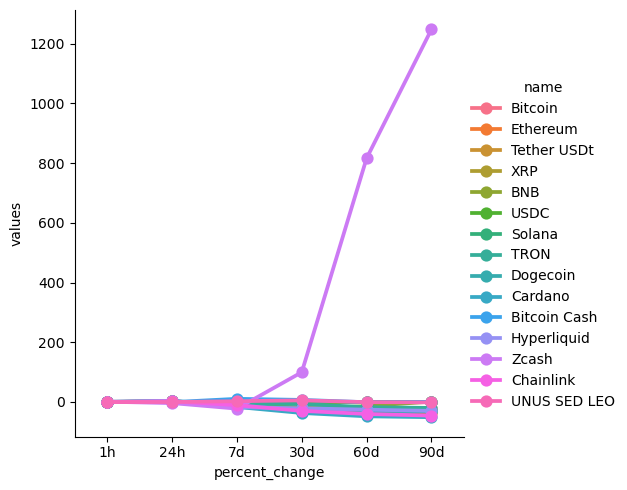

In [59]:

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:

# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,86925.39770,2025-11-24 12:34:53.428286
0,Bitcoin,86925.39770,2025-11-24 12:34:53.927396
0,Bitcoin,86959.01141,2025-11-24 12:35:54.361497
0,Bitcoin,86965.68756,2025-11-24 12:36:54.868842
0,Bitcoin,87013.55875,2025-11-24 12:37:55.216965
0,Bitcoin,86984.29831,2025-11-24 12:38:55.971788


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

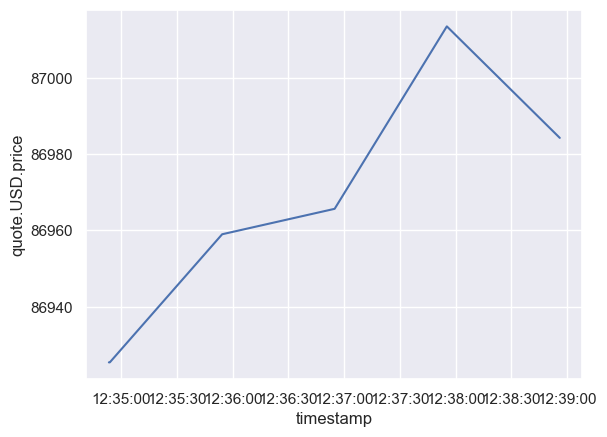

In [61]:

sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)